# CMS-COR-SAP. Exercise 5
By *Oleh Shkalikov*

In [1]:
import numpy as np
from scipy import stats, integrate
from matplotlib import pyplot as plt

In [2]:
def mc(f, min, max, N, samp_dist, use_antithetic=False):
    #sampling 
    if(use_antithetic):
        u = stats.uniform.rvs(size=(N // 2))
        rvs = samp_dist.ppf(u)
        arvs = samp_dist.ppf(1 - u)
        rvs = np.concatenate([rvs, arvs], axis=0)
    else:
        rvs = samp_dist.rvs(size=(N))        

    # indicator    
    mask = (min <= rvs) & (rvs <= max)    
    rvs = rvs[mask]
    
    # result calcuation    
    y = f(rvs) / samp_dist.pdf(rvs)         
    return np.mean(y)

In [3]:
def mean_var(n_trials, f, min, max, N, samp_dist, use_antithetic=False, plot_box=False):
    results = np.empty(n_trials)
    for i in range(n_trials):
        results[i] = mc(f, min, max, N, samp_dist, use_antithetic)

    if plot_box:
        plt.boxplot(results)

    return np.mean(results), np.var(results, ddof=1)

## Variance of MC Integration vs Importance Sampling

Numerically compute the mean and variance of $\int\limits_0^1 x^2 dx$ using simple MC integration
with a standard uniform PDF proposal $p(x)$ and importance sampling with the proposal
PDF $q(x) = 2x$, ($0 \leq x \leq 1$). Compare the mean and variances with the analytical
solution (see lecture notes) for $N = 100$ samples.

The analytical solution for the mean is the following:
$$ 
    \int\limits_0^1 x^2 dx = \frac{x^3}{3} \Big|_0^1 = \frac{1}{3}
$$

The expected variance of the MC integration with a standard uniform sampling is ($x_1$ has a uniform distibution):
$$
  \text{var} \; \theta_N = \frac{\text{var} \; x_1^2}{N} = 
  \frac{1}{N} \int\limits_0^1 x^4 dx - \frac{1}{N} \left( \int\limits_0^1 x^2 \right)^2 = 
  \frac{1}{5N} - \frac{1}{9N} = \frac{4}{4500}
$$

Regarding variance for the importance sampling we have ($y_1$ has a triangular distribution with the lower limit $0$, upper limit $1$ and mode $1$):
$$
    \text{var} \; \theta_N = \frac{\text{var} \; x_1}{4N} = \frac{1}{18 \cdot 400} = \frac{1}{7200}
$$

In [4]:
f1a = lambda x: x**2

The MC integration result for the uniform sampling is the following:

Mean 0.333619751235408
Var 0.001120042716304014


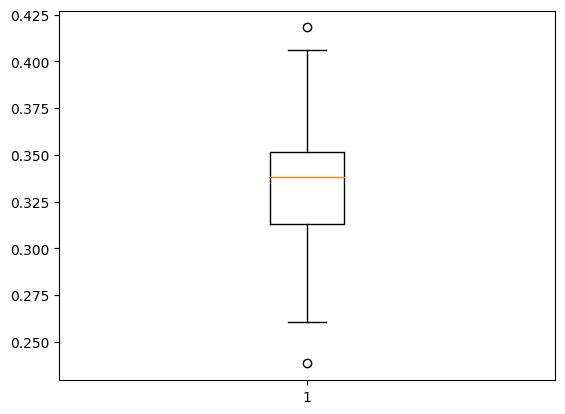

In [5]:
mean1a, var1a = mean_var(100, f1a, 0, 1, 100, stats.uniform, plot_box=True)
print(f'Mean {mean1a}')
print(f'Var {var1a}')

The MC integration result for the sampling from triangular distribution is the following:

Mean 0.3320633989160068
Var 0.00014752711288869012


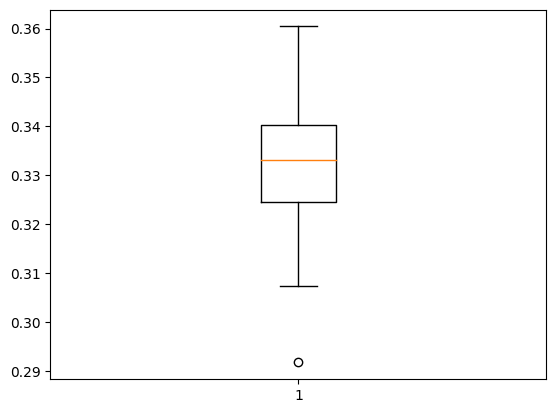

In [6]:
mean1ai, var1ai = mean_var(100, f1a, 0, 1, 100, stats.triang(c=1), plot_box=True)
print(f'Mean {mean1ai}')
print(f'Var {var1ai}')

Compute the variance from using simple MC integration with a uniform proposal distribution 
from $X \sim U(0, 10)$ and importance sampling with a normal proposal distribution
from $X \sim N(5, 4)$ to estimate $\int\limits_0^{10} (10x - x^2)dx$. Solve this problem analytically and
numerically with $N = 100$ samples for each method.

The analytical solution for the mean is the following:
$$ 
    \int\limits_0^{10} (10x - x^2)dx = 
    \left( 5x^2 - \frac{x^3}{3} \right) \Bigg|_0^{10} = 
    500 - \frac{1000}{3}
$$

The theoretical variance for the uniform sampling ($x_1 \sim U(0,10)$):
$$
    \text{var} \; \theta_N = \frac{100 \cdot \text{var} \; (10x_1-x_1^2)}{N} = 
    \frac{100}{N} \int\limits_0^{10} \frac{(10x-x^2)^2}{10} dx - \frac{100}{N} \left( \int\limits_0^{10} 
    \frac{10x-x^2}{10} \right)^2
$$
$$ 
\int\limits_0^{10} \frac{(10x-x^2)^2}{10} dx = \left( \frac{10x^3}{3} - \frac{x^4}{2} + \frac{x^5}{50} \right) \Bigg|_0^{10} = \frac{1000}{3}
$$
$$
\int\limits_0^{10} \frac{10x-x^2}{10} = \left( \frac{x^2}{2} - \frac{x^3}{30} \right) \Bigg|_0^{10} = 
\frac{50}{3}
$$
Then
$$
\text{var} \; \theta_N = \frac{100}{N} \left( \frac{1000}{3} - \left( \frac{50}{3} \right )^2 \right ) =
\frac{50000}{9N} = 55.(5)
$$

For the variance with sampling from the normal distribution we have ($x_1 \sim N(5, 4) $):
$$
\text{var} \; \theta_N = 
\frac{1}{N} \frac{\text{var} \; 10x_1-x_1^2}{q(x)} =
\frac{1}{N} \int\limits_0^{10} \frac{(10x-x^2)^2}{q(x)} dx - 
\frac{1}{N} \left( \int\limits_0^{10} 10x-x^2 \right)^2
$$
where $q(x)$ is a PDF of the $N(5,4)$
$$
\int\limits_0^{10} 10x-x^2 = 
\left( 5x^2 - \frac{x^3}{3} \right) \Bigg|^{10}_0 = \frac{500}{3}
$$
Let's calculate the first integral numerically

In [7]:
f1b = lambda x: 10*x - x**2

In [8]:
integrate.quad(lambda x: f1b(x)**2 / stats.norm.pdf(x, loc=5, scale=2), 0, 10)

(31099.274716202097, 2.709343070728121e-07)

As we can see approximate value of the integral is $31100$, so the variance is equal to
$$
\text{var} \; \theta_N = \frac{1}{N} \left( 31100 - \left( \frac{500}{3} \right)^2 \right)
\approx \frac{3322}{N} = 33.22
$$

The MC integration result for the uniform sampling is the following:

Mean 166.76518350484915
Var 57.19753122048554


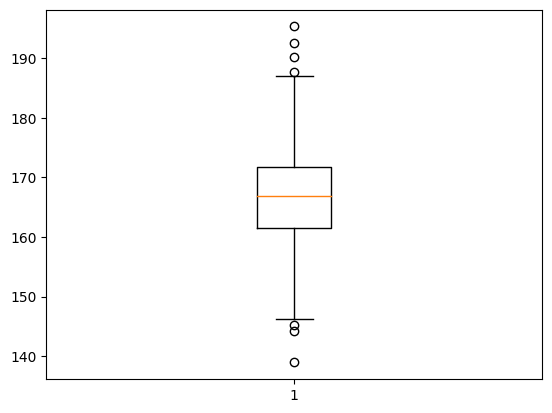

In [9]:
mean1b, var1b = mean_var(1000, f1b, 0, 10, 100, stats.uniform(loc=0, scale=10), plot_box=True)
print(f'Mean {mean1b}')
print(f'Var {var1b}')

The MC integration result for the sampling from $N(5,4)$ is the following:

Mean 168.97780576264512
Var 32.75911074875266


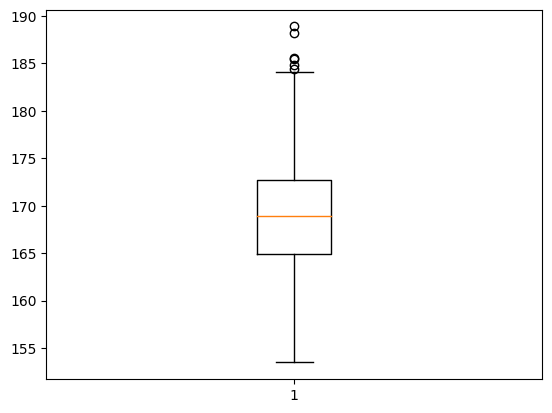

In [10]:
mean1bi, var1bi = mean_var(1000, f1b, 0, 10, 100, stats.norm(loc=5, scale=2), plot_box=True)
print(f'Mean {mean1bi}')
print(f'Var {var1bi}')

## Optimum Proposal Distribution

Find the optimum $\sigma^2$ for the proposal distribution $q(x) \sim N(0.5, \sigma^2)$ to estimate the integral of the PDF of $X \sim Beta(2, 2)$ from $0$ to $1$ by importance sampling. Solve this problem
numerically by scanning through $\sigma$ values from $0.03$ to $0.3$ in increments of $\frac{(0.3 − 0.03)}{20}$. Use $N = 1000$ samples to obtain the variances.

In [11]:
f2 = lambda x: stats.beta.pdf(x, 2, 2)

In [12]:
sigmas2 = np.linspace(0.03, 0.3, 20)
means = np.empty_like(sigmas2)
vars = np.empty_like(sigmas2)

for i, sigma2 in enumerate(sigmas2):    
    sampl_dist = stats.norm(loc=0.5, scale=np.sqrt(sigma2))
    mean, var = mean_var(100, f2, 0, 1, 1000, sampl_dist)
    
    means[i] = mean
    vars[i] = var

imin = np.argmin(vars)
print(f'Best Sigma square {sigmas2[imin]}')
print(f'Best Mean {means[imin]}')
print(f'Best Var {vars[imin]}')

Best Sigma square 0.05842105263157894
Best Mean 1.040595635681737
Best Var 2.0809965277541472e-05


<StemContainer object of 3 artists>

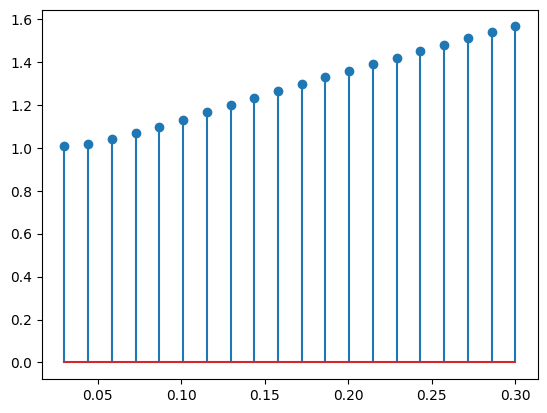

In [13]:
plt.stem(sigmas2, means)

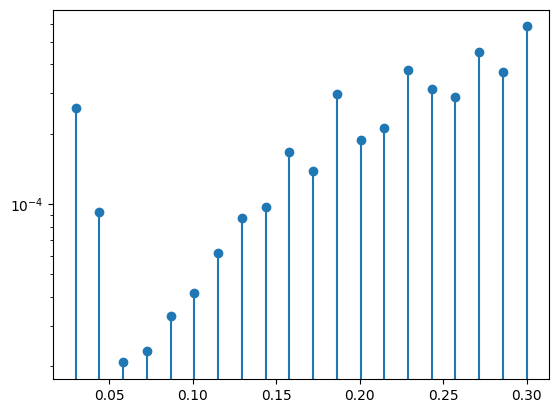

In [22]:
plt.stem(sigmas2, vars)
plt.yscale('log')

## Variance Reduction by Antithetic Variates

Estimate $ \int\limits_0^1 \frac{10}{x+1} dx $ using MC integration with $2N = 100$ samples from a uniform
proposal distribution $X \sim U(0, 1)$ and with $N = 50$ samples from $X$ together with its
antithetic variates $1 - X$. Compare the mean and variance between the two approaches from 1000 trials.

In [15]:
f3a = lambda x: 10 / (x + 1)

The MC integration result for the sampling from uniform distribution is the following:

Mean without antithetic 6.933259653632127
Var without antithetic 0.018618943504912847


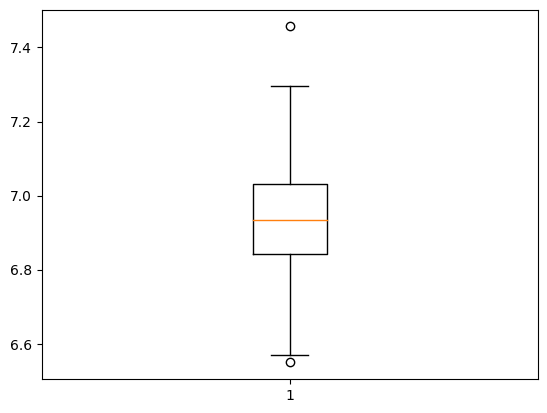

In [16]:
mean3a, var3a = mean_var(1000, f3a, 0, 1, 100, stats.uniform, use_antithetic=False, plot_box=True)
print(f'Mean without antithetic {mean3a}')
print(f'Var without antithetic {var3a}')

The MC integration result for the sampling from uniform distribution with antithetic variates is the following:

Mean with antithetic 6.9309387946585135
Var with antithetic 0.0011759078632094372


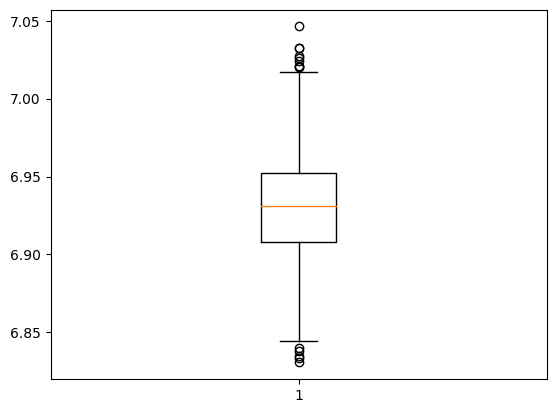

In [17]:
mean3aa, var3aa = mean_var(1000, f3a, 0, 1, 100, stats.uniform, use_antithetic=True, plot_box=True)
print(f'Mean with antithetic {mean3aa}')
print(f'Var with antithetic {var3aa}')

Estimate $ \int\limits_0^{10} (10x - x^2) dx $ by importance sampling with a proposal distribution $p(x) \sim N(5, 4)$ using antithetic variates from a uniform distribution. Use $1000$ trials and a total of $2N = 100$ samples to obtain the importance sampling variance.

Mean with antithetic 168.49679129651162
Var with antithetic 58.621576260109165


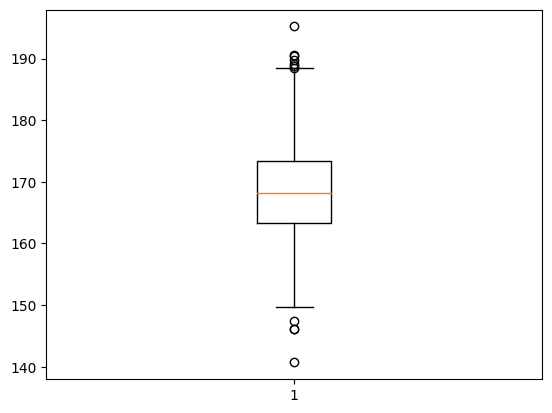

In [18]:
mean3ba, var3ba = mean_var(1000, f1b, 0, 10, 100, stats.norm(loc=5, scale=2), use_antithetic=True, plot_box=True)
print(f'Mean with antithetic {mean3ba}')
print(f'Var with antithetic {var3ba}')

As we can see the variance has increased because of covariance term in antithetic variates became greater or equal than zero